In [3]:
import pandas as pd
import numpy as np
import random as ra
from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

dataset = pd.read_csv('data_TV.csv', sep=",")
dataset

df = dataset.drop(["first_air_date","origin_country","original_language","name","vote_average","overview"], axis=1).to_numpy().copy()
dk = dataset.drop(["first_air_date","origin_country","original_language","name","vote_average","overview"], axis=1).copy()

dk = dk.iloc[:100]


D = df.shape[1]
det = []
for i in range(0,100):
    det.append(list(df[i]))
    
    
T = len(det)
k = 0
Index = []
dist = []

In [4]:
T = len(det)
D = len(det[0])

In [5]:
det

[[30.104, 3071.0],
 [468.253, 10131.0],
 [95.667, 2615.0],
 [1511.996, 7220.0],
 [195.038, 1627.0],
 [106.235, 3909.0],
 [117.989, 4064.0],
 [103.762, 4422.0],
 [101.767, 3318.0],
 [89.893, 1450.0],
 [71.587, 3236.0],
 [280.696, 1184.0],
 [138.869, 2328.0],
 [280.96, 1562.0],
 [10.638, 127.0],
 [59.795, 1609.0],
 [51.144, 1475.0],
 [10.34, 761.0],
 [664.403, 820.0],
 [277.186, 1181.0],
 [48.446, 640.0],
 [64.215, 299.0],
 [13.838, 147.0],
 [71.952, 556.0],
 [18.833, 518.0],
 [32.411, 400.0],
 [64.764, 1064.0],
 [28.68, 484.0],
 [132.028, 1537.0],
 [42.624, 606.0],
 [83.455, 1060.0],
 [73.022, 485.0],
 [57.967, 705.0],
 [57.355, 346.0],
 [290.221, 481.0],
 [43.225, 862.0],
 [85.185, 1038.0],
 [15.796, 112.0],
 [29.437, 620.0],
 [36.9, 613.0],
 [60.796, 992.0],
 [17.059, 1098.0],
 [190.241, 741.0],
 [41.546, 1379.0],
 [104.81, 1050.0],
 [28.14, 790.0],
 [169.94, 1234.0],
 [26.256, 488.0],
 [14.332, 280.0],
 [28.387, 401.0],
 [13.735, 106.0],
 [27.071, 258.0],
 [54.052, 2944.0],
 [32.638,

In [6]:
u = [0 for i in range(D)]
for i in det:
    for k in range(D):
        u[k] += i[k]/T

def va(a, b):
    if ((a-b) > 0):
        return (a-b)
    else:
        return (-(a-b))
        
s = [0 for i in range(D)]
for i in det:
    for k in range(D):
        s[k] += va(u[k], i[k])/T
print(u, s)

# centrer les données
for i in range(T):
    for k in range(D):
        det[i][k] = (det[i][k]-u[k])/s[k]

for i in range(dk.shape[0]):
    k = 0
    for x in dk:
        dk[x][i] = (dk[x][i]-u[k])/s[k]
        k += 1

[98.08336999999995, 1325.9699999999996] [81.11885719999995, 1175.0931999999993]


C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_6316\4094963049.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk[x][i] = (dk[x][i]-u[k])/s[k]


In [7]:
m = [0 for i in range(D)]
for i in det:
    for x in range(D):
        m[x] += (i[x]/T)

def InList(G, k):
    for i in G:
        if (i == k):
            return True
    return False

GB = []
B = []
k = 0
G = {}


for i in det:
    GB.append(list(i))
length = len(GB)-1


while (len(GB) > 0):
    #print(len(GB))
    c1 = GB[ra.randint(0, len(GB)-1)]
    G[k] = [c1]
    distMin = np.linalg.norm(np.array(c1)-np.array(m))
   
    m = [0 for i in range(D)]
    for i in GB:
        for x in range(D):
            m[x] += (i[x]/len(GB))


    for i in range(len(GB)):
        dist = np.linalg.norm(np.array(c1)-np.array(GB[i]))
        if ((dist < distMin) and (c1 != GB[i])):
            G[k].append(GB[i])

    for i in G[k]:
        if InList(GB, i):
            GB.remove(i)
    k += 1   




In [8]:

print( "on à ", k, "Groupe")
som = 0
for i in G:
    print("le groupe ",i+1," à ", len(G[i])," éléments")
    som += len(G[i])

on à  5 Groupe
le groupe  1  à  74  éléments
le groupe  2  à  12  éléments
le groupe  3  à  4  éléments
le groupe  4  à  9  éléments
le groupe  5  à  1  éléments


In [9]:
colone1 = []
colone2 = []
colone3 = []
G[1]

for i in G:
    for x in G[i]:
        colone1.append(x[0])
        colone2.append(x[1])
        colone3.append(i)

on à  [5.708470828901179, 10.808529910648796] Groupe
le groupe  1  à  76  éléments
le groupe  2  à  12  éléments
le groupe  3  à  1  éléments
le groupe  4  à  9  éléments
le groupe  5  à  2  éléments


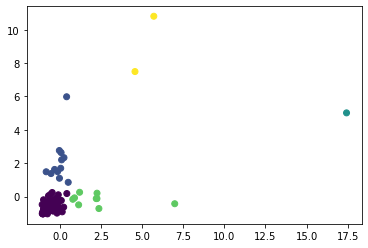

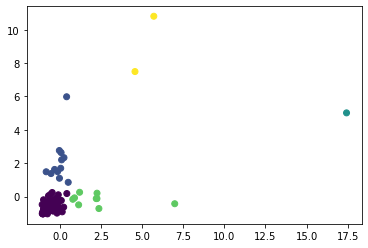

In [21]:
print( "on à ", k, "Groupe")
som = 0
for i in G:
    print("le groupe ",i+1," à ", len(G[i])," éléments")
    som += len(G[i])
plt.scatter(colone1, colone2, c=colone3)
plt.show()

plt.scatter(colone1, colone2, c=colone3)
plt.show()


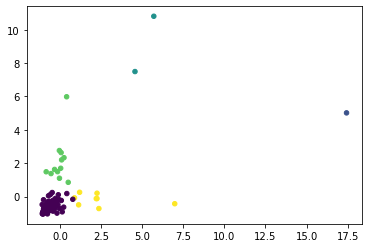

In [11]:
model= KMeans(n_clusters=len(G))
model.fit(dk)
plt.scatter(dk.popularity, dk.vote_count, c=model.labels_, s=20)


In [12]:
g = {}
for i in G:
    g[i] = [0 for u in range(D)]
    for j in G[i]:
        for k in range(D):
            g[i][k] += j[k]/len(G[0])
            
            
Y = {}
V = {}
for i in G:
    Y[i] = []
    for x in G[i]:
        nk = len(G[i])
        a = (x[0] - g[0][0]) / nk
        b = (x[1] - g[0][1]) / nk
        Y[i].append([a,b])
    V[i] = np.dot(np.array(Y[i]).T, np.array(Y[i]))
    
W = np.zeros((2,2))
for i in g:
    W += V[i]*(len(G[i])/T)
W

gn = [0 for i in range(D)]
for i in df:
    for k in range(D):
        gn[k] += i[k]
        
S = {}
for i in g:
    a = (g[i][0] - gn[0]) * (len(G[i])/T)
    b = (g[i][0] - gn[1]) * (len(G[i])/T)
    S[i] = np.array([[a*a,a*b],[b*a, b*b]])

B = np.zeros((2,2))
for i in g:
    B += S[i]*(len(G[i])/T)

In [13]:
g

{0: [-0.6467445748337141, -0.631241247330252],
 1: [-0.0072620232503351695, 0.26656149026698034],
 2: [0.4686927201661547, 0.30928104600899253],
 3: [0.17983299315873383, -0.02543478529468404],
 4: [0.005480884759161884, 0.0808334963489636]}

In [14]:
B # matrice inter groupe

array([[9.98826089e+09, 1.01011849e+11],
       [1.01011849e+11, 1.02153856e+12]])

In [15]:
W # matrice intra groupe 

array([[1.19906547, 0.6393734 ],
       [0.6393734 , 1.07002336]])

In [16]:
ItemC = []



Len = [(len(G[u])-1) for u in G]
for i in G:
    ItemC.append(G[i][ra.randint(0, Len[i])])

#print(ItemC)

def Fit():    
    s = []
    for i in G:
        s.append([0 for i in range(D)]) 
        
    for j in G:    
        for i in G[j]:
            for x in range(D):
                s[j][x] += (i[x] / len(G[j]))

    for i in G:
        G[i].clear()

    Dist = [0 for i in G]
    for i in range(T):
        for x in G:
            Dist[x] = distance.cityblock(s[x], det[i])
        for x in G:  
            if (Dist[x] == min(Dist)):
                G[x].append(det[i])

                
    L = []            
    for i in G:
        L.append(len(G[i]))
    return L

c = Fit()  
while (c != Fit()):
    c = Fit()
print(c)  

[76, 12, 1, 9, 2]


In [17]:
for i in G:
    print("les élements du Groupe ", i+1, "sont")
    for k in G[i]:
        print(k)

les élements du Groupe  1 sont
[-0.10096752201287112, 0.10554907474573123]
[-1.0779906549275202, -1.0203190691597912]
[-0.47200332107242715, 0.24085749113346974]
[-0.5786493007941436, 0.12682398298279704]
[-1.0816642767003872, -0.4807873962678023]
[-0.6119091381874149, -0.5837579521352008]
[-0.4175153739715155, -0.8739477004887783]
[-1.0385423674336478, -1.0032991425701385]
[-0.3221368113652366, -0.6552416438117419]
[-0.9769660561736808, -0.6875795043320819]
[-0.8095820413012423, -0.7879970712110326]
[-0.41074752714834806, -0.22293550843456478]
[-0.8555762790011294, -0.7165133795344915]
[0.41845547597285515, 0.17958575541072022]
[-0.6836803662465795, -0.6126918273376103]
[-0.18033254541460622, -0.22633949375249532]
[-0.30894629023447284, -0.7156623832050087]
[-0.4945381553033019, -0.5284431907188297]
[-0.5020826402865051, -0.8339508730030947]
[-0.6762714847516365, -0.3948367669900565]
[-0.15900581498823124, -0.24506141300111323]
[-1.0144049465233345, -1.0330840141020305]
[-0.8462442934

In [18]:
colone1 = []
colone2 = []
colone3 = []
G[1]

for i in G:
    for x in G[i]:
        colone1.append(x[0])
        colone2.append(x[1])
        colone3.append(i)

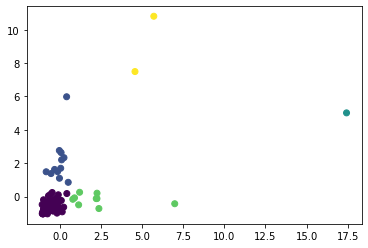

In [19]:
plt.scatter(colone1, colone2, c=colone3)
plt.show()

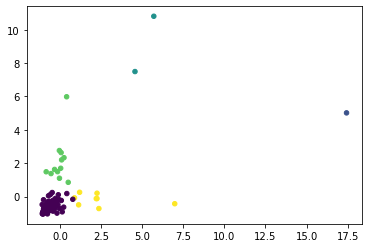

In [20]:
model= KMeans(n_clusters=len(G))
model.fit(dk)
plt.scatter(dk.popularity, dk.vote_count, c=model.labels_, s=20)